In [1]:
# Import libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### SVM from scratch

In [5]:
# When lambda is with Margin

class SvmGD:
    '''
    This class will seperate the binary classes 
    '''
    def __init__(self, lr=0.01, lambda_=0.01, epoch=1000):
        '''
        for initilization
        '''
        self.lr = lr
        self.lambda_ = lambda_
        self.epoch = epoch
        self.w = None
        self.b = None

    def fit(self, X, y):
        '''
        To update and learn the parameters
        '''
      
        # shape of data
        n, m = X.shape

        
        # random Initilization
        self.w = np.ones(m)
        self.b = 0


        # Check loss for each observation using hinge loss + margin maximization
        for ep in range(self.epoch):
            for i in range(n):
                x_i = X[i]
                y_i = y[i]
                # condition/constraint = y_i * (np.dot(self.w, x_i) + self.b)
                condition = y_i*(self.w.T @ x_i + self.b)
                if condition >= 1:
                    self.w -= self.lr * 2 * self.lambda_* self.w
                else:
                    self.w -= self.lr * 2 *((self.lambda_*self.w) - (y_i * x_i))
                    #self.b -= self.lr * -y_i # another way
                    self.b += self.lr * y_i
                    
        print(self.w, self.b)

    def predict(self, X):
        '''
        To give prediction for which class it belongs
        '''
        # pred = np.dot(X, self.w) + self.b
        pred = X @ self.w + self.b
        pred = np.where(pred < 0, -1, 1)
        return pred

In [6]:
# create instance for the class

svmgd = SvmGD()

In [7]:
# call the fit method

svmgd.fit(X_train_scaled,y_train) 

[-0.3976671  -1.78272677  0.64709346  1.19477341] -2.99999999999998


In [8]:
# accuracy

accuracy_score(y_test, svmgd.predict(X_test_scaled))

0.9375

In [9]:
confusion_matrix(y_test, svmgd.predict(X_test_scaled))

array([[318,  12],
       [ 13,  57]])

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, svmgd.predict(X_test_scaled)).ravel()
tn, tp, fp, fn

(np.int64(318), np.int64(57), np.int64(12), np.int64(13))

In [11]:
confusion_matrix(y_test, svmgd.predict(X_test_scaled))

array([[318,  12],
       [ 13,  57]])

In [24]:
# When c is with hinge loss

class SvmGD1:
    '''
    This class will seperate the binary classes 
    '''
    def __init__(self, lr=0.001, c_= 1, epoch=5000):
        '''
        for initilization
        '''
        self.lr = lr
        self.c_ = c_
        self.epoch = epoch
        self.w = None
        self.b = None

    def fit(self, X, y):
        '''
        To update and learn the parameters
        '''
        # shape of data
        n, m = X.shape
        
        # random Initilization
        self.w = np.ones(m)
        self.b = 0


        # Check loss for each observation using hinge loss + margin maximization
        for ep in range(self.epoch):
            for i in range(n):
                x_i = X[i]
                y_i = y[i]
                condition = y_i*(self.w @ x_i + self.b)
                if condition >= 1:
                    self.w -= self.lr * self.w
                else:
                    self.w -= self.lr * (self.w - (self.c_* y_i * x_i))
                    # self.b -= self.lr * (-self.c_) * y_i
                    self.b += self.lr * self.c_ * y_i
                    
        print(self.w, self.b)

    def predict(self, X):
        '''
        To give prediction for which class it belongs
        '''
        pred = X @ self.w + self.b
        pred = np.where(pred < 0, -1, 1)
        return pred

In [25]:
# map y , split and scale data

X = loan.iloc[:,:-1]
y = loan['default']

class_0 = pd.Series(y).unique()[0]
class_1 = pd.Series(y).unique()[1]
print(f"Treating {class_0} as -1 and {class_1} as 1")
y = np.where(y == class_0, -1, 1)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treating 0 as -1 and 1 as 1


In [26]:
# create instance for the class

svmgd1 = SvmGD1(c_= 0.6)

In [27]:
# call the fit method

svmgd1.fit(X_train_scaled,y_train) 

[-0.00469498 -0.04485357  0.02244893  0.02874205] -1.038600000000027


In [28]:
# accuracy

accuracy_score(y_test, svmgd1.predict(X_test_scaled))

0.825

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, svmgd1.predict(X_test_scaled)).ravel()
tn, tp, fp,fn

(np.int64(330), np.int64(0), np.int64(0), np.int64(70))

In [30]:
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=6)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [31]:
# create instance for the class

svmgd1 = SvmGD1(c_= 0.6, epoch= 10000)

In [32]:
# call the fit method

svmgd1.fit(X_train_std,y_train) 

[-0.24427826 -0.47741487] 0.15180000000000005


In [33]:
# accuracy

accuracy_score(y_test, svmgd1.predict(X_test_std))

0.9

In [34]:
# using SVC

svc = SVC(kernel= 'linear', degree= 1, C= 0.6)
svc

SVC(C=0.6, degree=1, kernel='linear')

In [35]:
svc.fit(X_train,y_train)

SVC(C=0.6, degree=1, kernel='linear')

In [36]:
accuracy_score(y_test, svc.predict(X_test))

0.95

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, svc.predict(X_test)).ravel()
tn, tp, fp,fn

(np.int64(11), np.int64(8), np.int64(0), np.int64(1))

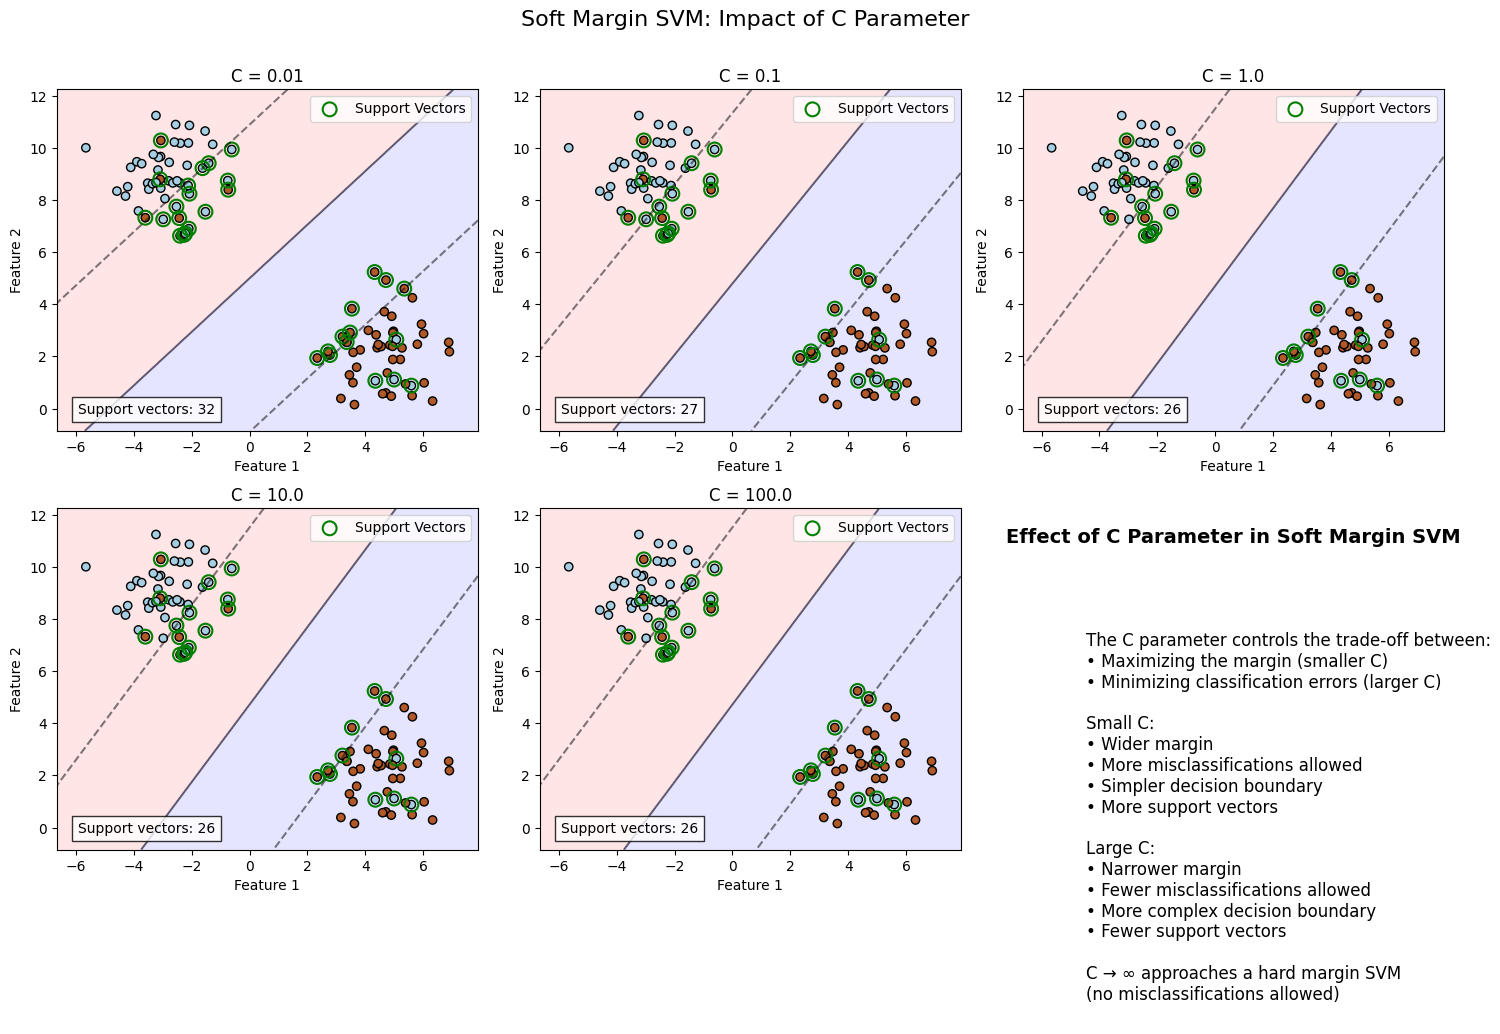

<Figure size 640x480 with 0 Axes>

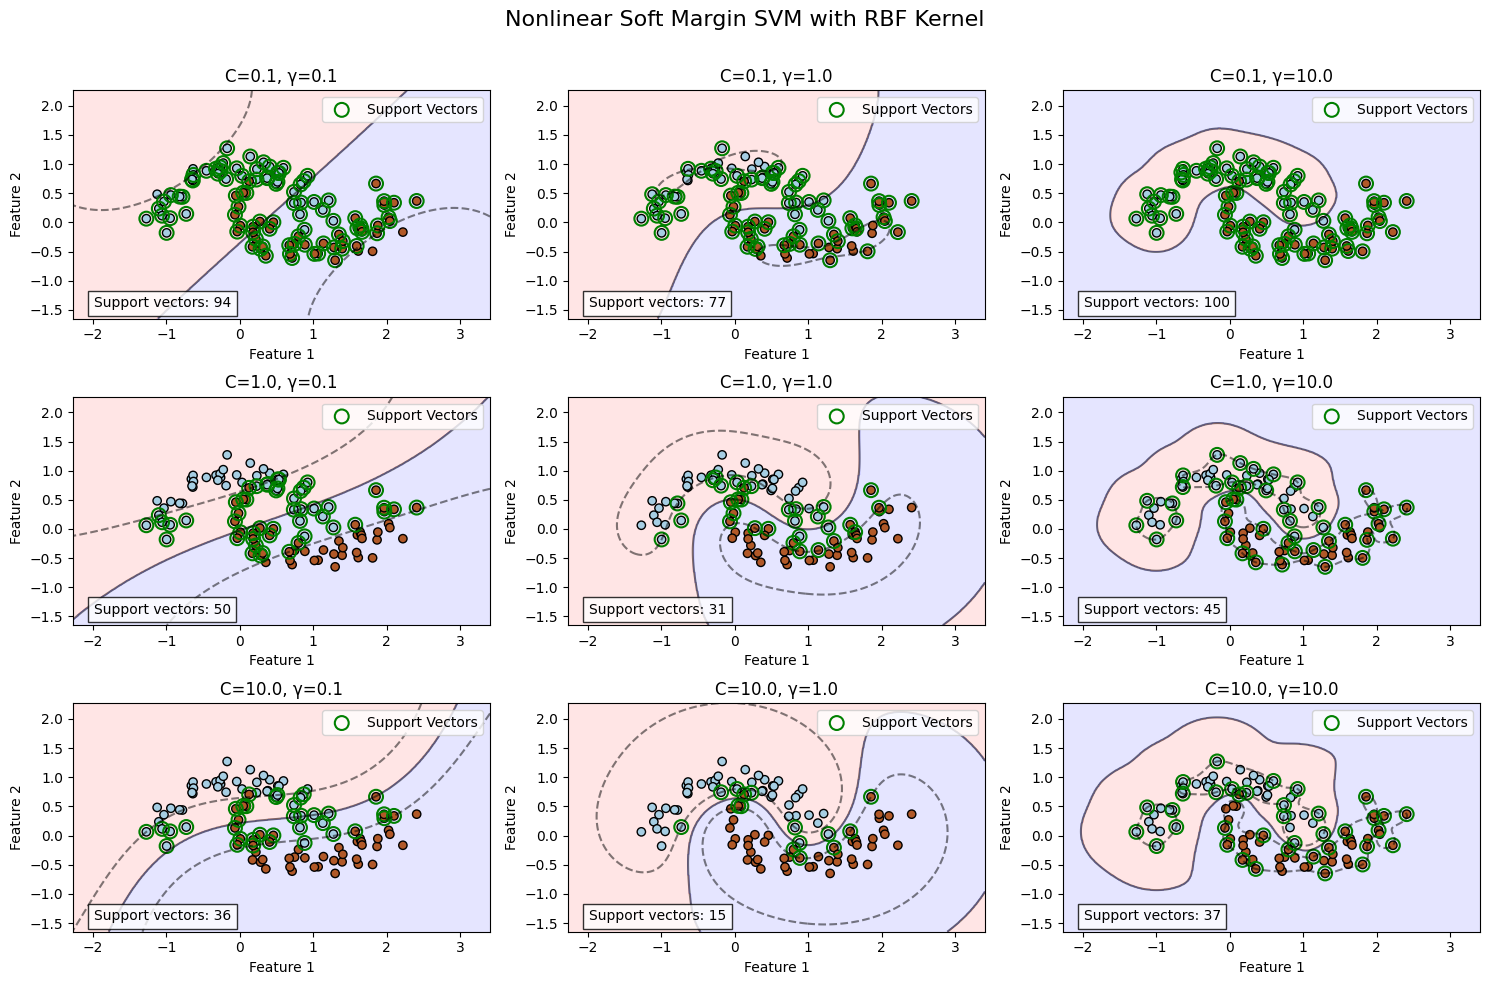

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_moons
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

def plot_svm_decision_boundary(X, y, model, title):
    """Plot the decision boundary and support vectors for a given SVM model"""
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Plot the decision boundary
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # Create a custom colormap for the background
    custom_cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
    
    # Plot the background colors
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.3)
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
    
    # Highlight the support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='none', s=100, edgecolor='green', linewidth=1.5, label='Support Vectors')
    
    # Add axis labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.tight_layout()
    
    # Add legend
    plt.legend()

def visualize_soft_margin_impact():
    """Create a visualization of how the C parameter affects soft margin SVM"""
    # Set up figure
    plt.figure(figsize=(15, 10))
    
    # Generate some sample data with slight overlap
    np.random.seed(42)
    X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.2, random_state=42)
    
    # Add some noisy points to create overlap
    noise_indices = np.random.choice(len(X), 10, replace=False)
    y[noise_indices] = 1 - y[noise_indices]  # Flip some labels
    
    # Create SVMs with different C values
    C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
    
    for i, C in enumerate(C_values):
        # Train an SVM with the current C value
        model = svm.SVC(kernel='linear', C=C)
        model.fit(X, y)
        
        # Plot the results
        plt.subplot(2, 3, i+1)
        plot_svm_decision_boundary(X, y, model, f'C = {C}')
        
        # Display number of support vectors
        plt.text(0.05, 0.05, f'Support vectors: {len(model.support_vectors_)}', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.subplot(2, 3, 6)
    plt.axis('off')
    plt.text(0.5, 0.9, 'Effect of C Parameter in Soft Margin SVM', 
             horizontalalignment='center', fontsize=14, fontweight='bold')
    plt.text(0.1, 0.7, """
    The C parameter controls the trade-off between:
    • Maximizing the margin (smaller C)
    • Minimizing classification errors (larger C)
    
    Small C:
    • Wider margin
    • More misclassifications allowed
    • Simpler decision boundary
    • More support vectors
    
    Large C:
    • Narrower margin
    • Fewer misclassifications allowed
    • More complex decision boundary
    • Fewer support vectors
    
    C → ∞ approaches a hard margin SVM
    (no misclassifications allowed)
    """, fontsize=12, verticalalignment='top', horizontalalignment='left')
    
    plt.suptitle('Soft Margin SVM: Impact of C Parameter', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
def visualize_nonlinear_soft_margin():
    """Visualize soft margin with nonlinear kernel (RBF)"""
    # Set up figure
    plt.figure(figsize=(15, 10))
    
    # Generate non-linear dataset
    X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
    
    # Different C values for RBF kernel
    C_values = [0.1, 1.0, 10.0]
    gamma_values = [0.1, 1.0, 10.0]
    
    plot_idx = 1
    for C in C_values:
        for gamma in gamma_values:
            # Train SVM with RBF kernel
            model = svm.SVC(kernel='rbf', C=C, gamma=gamma)
            model.fit(X, y)
            
            # Plot
            plt.subplot(3, 3, plot_idx)
            plot_svm_decision_boundary(X, y, model, f'C={C}, γ={gamma}')
            plt.text(0.05, 0.05, f'Support vectors: {len(model.support_vectors_)}', 
                     transform=plt.gca().transAxes, 
                     bbox=dict(facecolor='white', alpha=0.8))
            
            plot_idx += 1
    
    plt.suptitle('Nonlinear Soft Margin SVM with RBF Kernel', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

# Run both visualizations
if __name__ == "__main__":
    visualize_soft_margin_impact()
    plt.figure()
    visualize_nonlinear_soft_margin()
    plt.show()